In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
import seaborn as sns

**Load Data Set**

In [3]:
data = pd.read_csv('./dataset/tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
data['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
data['outlook'].value_counts()

sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

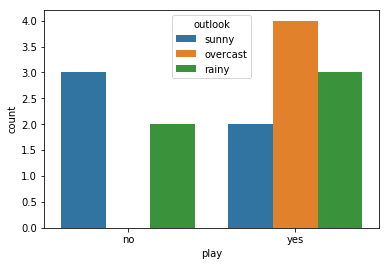

In [7]:
sns.countplot(x='play',hue= 'outlook',data=data)

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.outlook.unique()

In [ ]:
data.outlook.value_counts()

In [ ]:
data.play.value_counts()

# Outlook vs Play

In [ ]:
group = data[['outlook','play']].groupby(by=['outlook'])

In [ ]:
group.count()

In [ ]:
table = pd.crosstab(data['play'],columns=data['outlook'])
table

In [ ]:
table['total'] = table['overcast']+table['rainy']+table['sunny']

In [ ]:
table

In [ ]:
table.loc['total'] = table.loc['no'] + table.loc['yes']


# Pivot Table

In [ ]:
table

# Contingency Table

In [ ]:
prob = table.div(14)# table.div(len(data)), table.div(table.iloc[-1,-1])
prob

##  Marginal Probability:
- $P(overcast)$
- $P(rainy)$
- $P(sunny)$

In [ ]:
prob

In [ ]:
prob['overcast'].total

In [ ]:
# P(overcast)
p_o = prob['overcast'].total
# P(rainy)
p_r = prob['rainy'].total
# P(sunny)
p_s = prob['sunny'].total


In [ ]:
# print
print('Probability of overcast: P(overcast) = %0.3f'%p_o )
print('Probability of rainy: P(rainy) = %0.3f'%p_r )
print('Probability of sunny: P(sunny) = %0.3f'%p_s )

##  Marginal Probability:
- $P(no)$
- $P(yes)$

In [ ]:
# P(no)
p_no = prob.loc['no'].total
# P(yes)
p_yes = prob.loc['yes'].total

In [ ]:
# print
print('Probability of No: P(no) = %0.3f'%p_no )
print('Probability of Yes: P(yes) = %0.3f'%p_yes )

# Conditionality Probability

# $P(A|B) = \frac{P(A and B)}{P(B)}$
- $P(Sunny | Yes)$
- $P(Rainy | Yes )$
- $P(Overcast | Yes)$
- $P(Sunny | No )$
- $P(Rainy | No )$
- $P(Overcast | No)$


>  Working on how to compute conditional probability

In [ ]:
prob

In [ ]:
prob['overcast'].yes

In [ ]:
prob['overcast']['yes'] # joint probability

In [ ]:
prob['total']['yes'] # marginal probability

In [ ]:
prob['overcast']['total'] # marginal probability

In [ ]:
prob # p(rainy and yes)

In [ ]:
def margin(A):
    try:
        p = prob[A][-1]
        print('in try')
        return p
    except:
        p = prob.loc[A][-1]
        print('in except')
        return p

In [ ]:
margin('yes')

> 

In [ ]:
def jointprob(A,B,table):
    """
    jointprob(A,B) will return probability of combination attribute from 
    contigency table. P(A and B)
    A = column
    B = row
    >>> jointprob(A,B,table)
    
    """
    return table[A][B]#.loc[B]

def marginprob(B,table):
    """
    marginprob(B) will return probability of attribute from 
    contigency table. P(B)
    B = row
    >>> marginprob(B,table)
    
    """
    try:
        return table.loc[B][-1]
    except:
        return table[B][-1]

def conditional(event,given,table):
    """
    conditional(event,given,table)
    """
    return jointprob(event,given,table)/marginprob(given,table)

In [ ]:
table

In [ ]:
margin = 'no'
try:
    pm = table[margin][-1]
    print('you are in try')
except KeyError:
    pm = table.loc[margin][-1]
    print('you are in except')

In [ ]:
table.loc[margin].total

In [ ]:
prob

In [ ]:
p_sunny_given_yes = conditional('sunny','yes',prob)
print('Probability of sunny given yes: P(sunny|yes) = %0.3f'%p_sunny_given_yes)

In [ ]:
p_sunny_given_no = conditional('sunny','no',prob)
print('Probability of sunny given no: P(sunny|no) = %0.3f'%p_sunny_given_no)

In [ ]:
p_overcast_given_yes = conditional('overcast','yes',prob)
print('Probability of overcast given yes: P(overcast|yes) = %0.3f'%p_overcast_given_yes)

In [ ]:
p_overcast_given_no = conditional('overcast','no',prob)
print('Probability of overcast given no: P(overcast|no) = %0.3f'%p_overcast_given_no)

In [ ]:
p_rainy_given_yes = conditional('rainy','yes',prob)
print('Probability of rainy given yes: P(rainy|yes) = %0.3f'%p_rainy_given_yes)

In [ ]:
p_rainy_given_no = conditional('rainy','no',prob)
print('Probability of rainy given no: P(rainy|no) = %0.3f'%p_rainy_given_no)

# Probability Tree

In [ ]:
prob.index.name

In [ ]:
ind1 = 'P(%s)=%0.3f'%('yes',marginprob('yes',prob))


In [ ]:
ind2

In [ ]:
start = prob.index.name
ind1 = 'P(%s)=%0.3f'%('yes',marginprob('yes',prob))
ind2 = 'P(%s)=%0.3f'%('no',marginprob('no',prob))


In [ ]:
# yes (1)
event11 = 'P(sunny|yes)=%0.2f'%(conditional('sunny','yes',prob)) 
event12 = 'P(rainy|yes)=%0.2f'%(conditional('rainy','yes',prob)) 
event13 = 'P(overcast|yes)=%0.2f'%(conditional('overcast','yes',prob)) 
event21 = 'P(sunny|no)=%0.2f'%(conditional('sunny','no',prob)) 
event22 = 'P(rainy|no)=%0.2f'%(conditional('rainy','no',prob)) 
event23 = 'P(overcast|no)=%0.2f'%(conditional('overcast','no',prob)) 

In [ ]:
print('event11 ={}\nevent12 ={}\nevent13 ={}\n'.format(event11,event12,event13))

In [ ]:
print('event21 ={}\nevent22 ={}\nevent23 ={}\n'.format(event21,event22,event23))

In [ ]:
drawData = {'from':[start,ind1,ind1,ind1,start,ind2,ind2,ind2],
            'to':[ind1,event11,event12,event13,ind2,event21,event22,event23]}
draw = pd.DataFrame(drawData)


In [ ]:
fig = plt.figure(figsize=(10,5))

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(draw, 'from', 'to')

# Make the graph
nx.draw(G, with_labels=True, node_size=5000,alpha=0.5 ,arrows=True)


#  Classification Report

In [ ]:
prob

# Bayes Theorem
## $P(A | B) = \frac{P(A) * A(B|A)}{P(B)}$
#### Example:
### $P(yes | rainy) = \frac{P(yes) * A(rainy|yes)}{P(rainy)}$

### $= \frac{P(yes) * A(rainy|yes)}{P(yes) * P(rainy|yes) + p(no) * P(rainy|no)}$

In [ ]:
def bayes(event,given,table):
    """
                    P(A) * P(B | A)
    P(A | B)  =    _______________
                        P(B)
    >>> bayes(event,given,table)
    """
    
    margin_A = marginprob(event,table) # marginal probability
    cond = conditional(given,event,table) # conditional probability
    margin_B = marginprob(given,table) # marginal probability
    
    return margin_A * cond / margin_B

In [ ]:
p_yes_sunny = bayes('yes','sunny',prob)
p_no_sunny = bayes('no','sunny',prob)

p_yes_overcast = bayes('yes','overcast',prob)
p_no_overcast = bayes('no','overcast',prob)

p_yes_rainy = bayes('yes','rainy',prob)
p_no_rainy = bayes('no','rainy',prob)




# Testing with test data

In [ ]:
def testGreater(yes,no):
    if yes >= no: return 'yes'
    else: return 'no'

In [ ]:
pred = []
for outlook in data['outlook']:
    if outlook == 'sunny':
        pred.append(testGreater(p_yes_sunny,p_no_sunny))
    elif outlook =='overcast':
        pred.append(testGreater(p_yes_overcast,p_no_overcast))
    else:
        pred.append(testGreater(p_yes_rainy,p_no_rainy))

In [ ]:
data['outlook_play'] = pd.Series(pred)
data.head(1)

!pip install pandas_ml

In [ ]:
from pandas_ml import ConfusionMatrix

In [ ]:
y_true = np.array(list(data['play']))
y_pred = np.array(list(data['outlook_play']))

np.where(y_true == 'yes', True, False), np.where(y_pred == 'yes', True, False)

In [ ]:
cm = ConfusionMatrix(np.where(y_true == 'yes', True, False), np.where(y_pred == 'yes', True, False))

In [ ]:
cm

In [ ]:
print(cm.print_stats())

# Great Job !!!